In [1]:
# Extracting tar file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tarfile
tarfile = tarfile.open("ratings_Electronics_Ver3.tar-1.xz")
tarfile.extractall()

In [2]:
#Rename column/add headers
filename = "ratings_Electronics.csv"
columnname = ['UserID','ProductID','Ratings','TimeStamp']
rating_df = pd.read_csv(filename, names = columnname)
rating_df.head(5)

,UserID,ProductID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
# Dropping timestamp as it is not of much use
rating_df = rating_df.drop('TimeStamp',axis = 1)
rating_df.head(5)

,UserID,ProductID,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [4]:
rating_df.shape

(7824482, 3)

In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
UserID       object
ProductID    object
Ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
# Descriptive analysis to find the characteristics of the data
rating_df.describe(include='all')

,UserID,ProductID,Ratings
count,7824482,7824482,7.824482e+06
unique,4201696,476002,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN
freq,520,18244,NaN
mean,NaN,NaN,4.012337e+00
std,NaN,NaN,1.380910e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,3.000000e+00
50%,NaN,NaN,5.000000e+00
75%,NaN,NaN,5.000000e+00


In [7]:
# Total user ratings available = 7824482 
# Unique users ratings = 4201696
# Total products sold = 476002
# since from 50% to 75% ratings are 5 so most of the users gave 5 ratings
# mean rating is 4

In [8]:
#considering the case when one user gave more than 50 reviews and there number is 452040 in total

In [9]:
rating_df['UserID'].value_counts().shape

(4201696,)

In [10]:
rating_new = rating_df[rating_df['UserID'].isin(rating_df['UserID'].value_counts()[rating_df['UserID'].value_counts()>=50].index)]

In [11]:
rating_new.shape

(125871, 3)

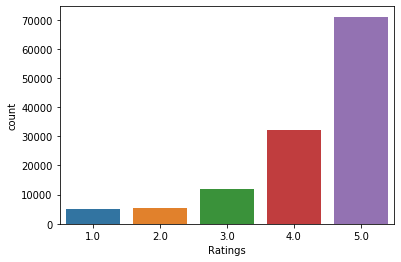

In [12]:
sns.countplot(data=rating_new,x='Ratings')
plt.show()

In [13]:
#Build Popularity Recommender model
# get the product and its mean rating 
pd.DataFrame(rating_new.groupby('ProductID')['Ratings'].mean().head())  

,Ratings
ProductID,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333


In [14]:
# Get the popular products based on mean rating
TopProduct = rating_new.groupby(['ProductID'])['Ratings'].mean().reset_index(name='MeanRating')
TopProduct.sort_values('MeanRating', ascending=False).head(30)

,ProductID,MeanRating
0,0594451647,5.0
26017,B003RRY9RS,5.0
26013,B003RR95Q8,5.0
26009,B003RIPMZU,5.0
26006,B003RFRNYQ,5.0
26005,B003RFHFJE,5.0
26003,B003RF6H66,5.0
26002,B003RDN2V6,5.0
25999,B003RCI4OW,5.0
25998,B003RCEAB8,5.0


In [15]:
# Above is the list of top 20 products based on average rating 

In [16]:
# Now we will be taking only 5 ratings products
TopRating_df =  rating_new[rating_new['Ratings'] == 5]

In [17]:
Product_reco = TopRating_df.groupby(['ProductID']).size().reset_index(name='Counts')

In [18]:
Product_reco.sort_values(by=['Counts'], ascending=False, inplace=True)

In [19]:
Product_reco['Rating_Rank'] = Product_reco['Counts'].rank(ascending= 0)
Product_reco.head(30)

,ProductID,Counts,Rating_Rank
16529,B003ES5ZUU,165,1.0
25695,B007WTAJTO,135,2.0
7277,B000N99BBC,134,3.0
26212,B0088CJT4U,91,4.0
25947,B00829TIEK,87,5.0
15070,B002WE6D44,85,6.0
10268,B0019EHU8G,84,7.0
14978,B002V88HFE,82,8.5
19259,B004CLYEDC,82,8.5
25943,B00829THK0,81,10.0


In [20]:
# Above is the list of top 30 popular products that is rated 5 and this can be recommended to user 

In [21]:
#Split dataset in 70:30 ratio
#Load the dataset into surprise dataframe
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_new[['UserID', 'ProductID', 'Ratings']], reader)

In [22]:
# split the data into train and test set
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=10,shuffle=True)

In [23]:
trainset

In [42]:
testset

[('A294BKN913UOGP', 'B0002E3WKO', 5.0),
 ('ANTN61S4L7WG9', 'B00HFAEBWG', 5.0),
 ('AROQO2VDODT7', 'B001G9TYHE', 5.0),
 ('A2YYHSORXIHZCS', 'B000AMLU1Q', 3.0),
 ('AYNAH993VDECT', 'B00CPIF4G0', 4.0),
 ('A3BKNXX8QFIXIV', 'B005N3TPJQ', 5.0),
 ('A2F4HP0J5VNOYR', 'B0009YWCT4', 4.0),
 ('APOGXH3A74CM3', 'B0039NLS3I', 5.0),
 ('A18YMFFJW974QS', 'B00D5EO27U', 5.0),
 ('A54SG05AV6S4H', 'B007S3T4O0', 5.0),
 ('A3MFORLOKIOEQY', 'B00G6IJ5NI', 5.0),
 ('A34UVV757IKPVB', 'B004CLYEFK', 4.0),
 ('A3EFSLEMHNPP6A', 'B00B7X2OV2', 4.0),
 ('A3AVJCB1ZD6ZY5', 'B0002II7QE', 5.0),
 ('A3223W5IROMYTY', 'B002VKVZ1A', 5.0),
 ('AVBLGXSWRN666', 'B004GW25WY', 4.0),
 ('A17BUUBOU0598B', 'B006YTZUA6', 4.0),
 ('APGQTZZ4ZFPHO', 'B0003V577C', 5.0),
 ('A19RGDJPNZ7NZ', 'B004GGUASG', 5.0),
 ('A10AFVU66A79Y1', 'B005H7MXZ6', 3.0),
 ('A3PDWA32BAMB2Y', 'B00834SJNA', 5.0),
 ('AGGAQLXPVGM5D', 'B001L2IKYE', 5.0),
 ('A357B3PUHSVQA', 'B00F3F0EIU', 5.0),
 ('A314KKDIJWCNMV', 'B004R7P28W', 5.0),
 ('A3INN916E4VION', 'B007BJHETS', 4.0),
 ('A1G650TT

### Building KNN Model

In [25]:
#Building Collaborative Filtering model
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [26]:
model = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': False})
model.fit(trainset)


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [28]:
# Evalute on test set
test_pred = model.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1329


1.1329360310271606

In [29]:
testset_new = trainset.build_anti_testset()

In [30]:
len(testset_new)

58539691

In [31]:
testset_new[0:5]

[('ABQWMANK4AR63', 'B001Q9EZS2', 4.261789374524737),
 ('ABQWMANK4AR63', 'B003Y5H17I', 4.261789374524737),
 ('ABQWMANK4AR63', 'B00180QHCG', 4.261789374524737),
 ('ABQWMANK4AR63', 'B00511PS3C', 4.261789374524737),
 ('ABQWMANK4AR63', 'B00007FHDM', 4.261789374524737)]

In [32]:
len(testset)

37762

In [34]:
predictions = model.test(testset_new[0:100000])

In [35]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [36]:
predictions_df.columns = ["UserID","ProductID","est_rating"]
predictions_df.sort_values(by = ["UserID", "est_rating"],ascending=False,inplace=True)

In [45]:
predictions_df.head()

,UserID,ProductID,est_rating
1,ABQWMANK4AR63,B003Y5H17I,5.0
2,ABQWMANK4AR63,B00180QHCG,5.0
4,ABQWMANK4AR63,B00007FHDM,5.0
9,ABQWMANK4AR63,B006WAPM78,5.0
10,ABQWMANK4AR63,B000BSLS0W,5.0


In [46]:
top_records = predictions_df.groupby("UserID").head(5).reset_index(drop=True)

In [47]:
top_records

,UserID,ProductID,est_rating
0,ABQWMANK4AR63,B003Y5H17I,5.0
1,ABQWMANK4AR63,B00180QHCG,5.0
2,ABQWMANK4AR63,B00007FHDM,5.0
3,ABQWMANK4AR63,B006WAPM78,5.0
4,ABQWMANK4AR63,B000BSLS0W,5.0
5,A6VPK7X53QNAQ,B003Y5H17I,5.0
6,A6VPK7X53QNAQ,B00180QHCG,5.0
7,A6VPK7X53QNAQ,B00007FHDM,5.0
8,A6VPK7X53QNAQ,B006WAPM78,5.0
9,A6VPK7X53QNAQ,B000BSLS0W,5.0


In [40]:
## Above is the top product recommendation for each user based on product ratings 

###  Summarise

To get the top product recommendation based on ratings we used 2 different apporach - popularity based and collaborative filtering. 
Popularity based recommendation is purely based on rating received by each product
Wheres Collaborative filtering we used item item collaboration approach where recommendation is based on similarity of ratings
of product.